# Setting Environments

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In Explauto, an *environment* implements the physical properties of the interaction between the robot body and the environment in which it evolves. Explauto comes with several sensorimotor systems available from the [environment package](http://flowersteam.github.io/explauto/explauto.environment.html):

In [2]:
from explauto.environment import environments
print('Available environments: {}'.format(environments.keys()))

simple_arm
pendulum
npendulum
Available environments: dict_keys(['simple_arm', 'pendulum', 'npendulum'])


According to your installation, you will see different available environments:
* a multi-joint arm acting on a plan ('simple_arm')
* an under-actuated torque-controlled inverse pendulum  ('pendulum')
* a pendulum chain ('npendulum', still in a beta version, need sympy installed).

These environments are simulated. Explauto also provides an interface with real robots based on Dynamixel actuators by providing bindings to the [Pypot](https://github.com/poppy-project/pypot) library  ([this tutorial](http://nbviewer.ipython.org/github/flowersteam/explauto/blob/master/notebook/poppy_environment.ipynb) shows how to use it on a [Poppy](http://www.poppy-project.org/) robot).

We will use the simple arm for this tutorial. It consists in the simulation of a $n$ degrees-of-freedom (DoF) arm with movements limited to a 2D plan.

Each available environment comes with a set of predefined configurations. A default configuration will always be defined.

In [3]:
env_cls, env_configs, _ = environments['simple_arm']
print('Available configurations for the simple arm environment: {}'.format(env_configs.keys()))

Available configurations for the simple arm environment: dict_keys(['low_dimensional', 'mid_dimensional', 'high_dimensional', 'high_dim_high_s_range', 'default'])


There are 4 different configurations for the simple arm (we see 5 above, but the 'default' one actually corresponds to the 'low_dimensional' one).

In the case of the simple_arm environment, a configuration must defines the following values:
* m_mins and m_maxs (bounds of the motor space)
* s_mins ans s_maxs (bounds of the sensory space)
* length_ratio (length ratio from one segment to the following one)
* noise (gaussian noise added in the sensor space)

The motor space corresponds to the angular position of each joint (hence $n$-dimensional), and the sensory space corresponds to the position of the end-effector on the plan ($x,y$: hence 2-dimensional). Arm total length is normalized to 1.

For instance, the default configuration defines a $n=3$ DoF arm where each segment is three time smaller than the previous one (from the "shoulder" to the end-effector). Each joint can move between $-\pi/3$ and $\pi/3$:

In [5]:
config = env_configs['default']

print('Default configuration for the simple arm:')
for config_key, value in config.items():
    print('\t{}: {}'.format(config_key, value))

Default configuration for the simple arm:
	m_mins: [-1.04719755 -1.04719755 -1.04719755]
	m_maxs: [1.04719755 1.04719755 1.04719755]
	s_mins: [-0.5 -1. ]
	s_maxs: [1. 1.]
	length_ratio: 3.0
	noise: 0.02


Once you have choose a configuration, say the 'default' one, you can create the Environment instance:

In [6]:
environment = env_cls(**config)

If you already now the name of the environment and the configuration you want to use (here: 'simple_arm' and 'default', respectively), you can alternatively use that shortcut:

In [7]:
from explauto import Environment
environment = Environment.from_configuration('simple_arm', 'default')

Each environment has an [update](http://flowersteam.github.io/explauto/explauto.environment.html#explauto.environment.environment.Environment.update) method, we take as argument a motor command vector $m$ (here: $n=3$-dimensional). It computes $m\_bounds$, the command $m$ bounded according to the configuration used (m_mins, m_maxs values), then computes the corresponding sensory effect vector $s$ ($2$-dimensional) and returns the corresponding $n+2=5$-dimensional vector:

In [9]:
from math import pi
m = [-pi/6., pi, pi/4.]
print(environment.update(m))

[ 0.81282284 -0.16804063]


We observe that the second value $\pi$ has been bounded to $m\_maxs[1] = \pi/3$. The two last values correspond to the resulting $x, y$ end-effector postion.

The simple arm environment also comes with a method to visualize the arm shape for a given motor configuration:

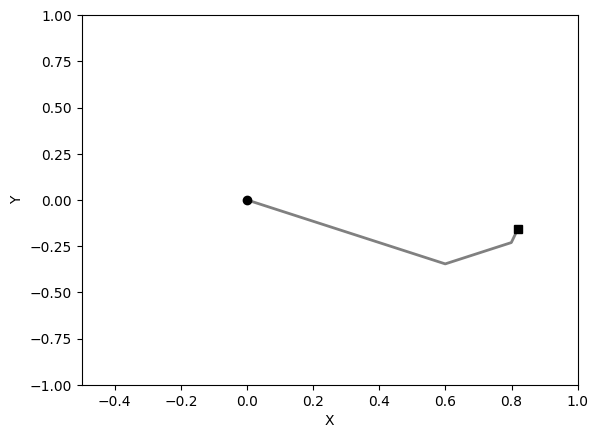

In [11]:
ax = plt.axes()
m = [-pi/6., pi/3., pi/4.]
environment.plot_arm(ax, m)

The base of the arm is fixed at (0, 0) (circle). The first angle position m[0] corresponds to the angle between a horizontal line and the segment attached to the base, anticlock-wise. Each following angle position, m[1] and m[2] are measured with respect to their respective previous segment. 

The sensory space (what will actually perceive the simulated robot) is the 2D hand position (position of the square).

Now let's see various arm shapes corresponding to random motor configurations. The Environment base class, from which every explauto environments derive, provides a random_motor method to uniformely sample motor configurations within their bounds (defined in the configuration dictionary, see above).

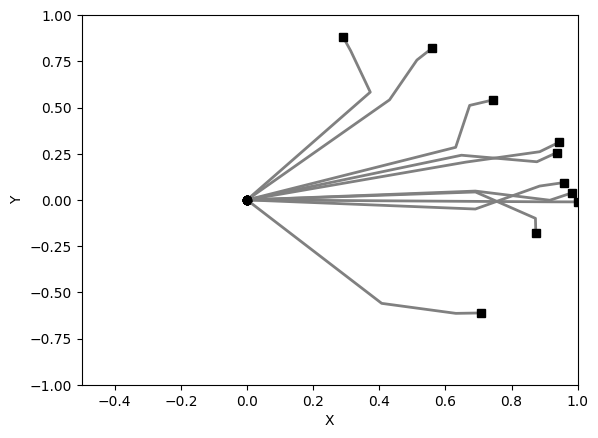

In [13]:
motor_configurations = environment.random_motors(n=10)
ax = plt.axes()
for m in motor_configurations:
    environment.plot_arm(ax, m)

# Exercise

Plot arm shapes corresponding to random motor configurations using the 'high_dimensional' configuration of the simple_arm. Then plot more, e.g. $100$, random configurations.

An interpretation of the obtained plot is provided below.

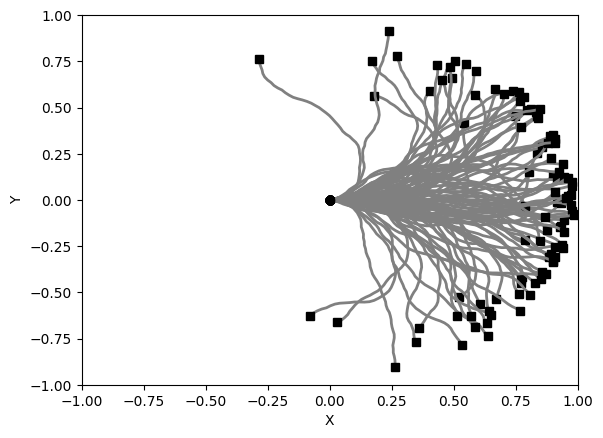

In [15]:
# %load exercise_solutions/setting_environment__high_dim_configuration.py
"""
First instanciate another simple arm environment, using the same class and the config you want:
"""

hd_env = env_cls(**env_configs['high_dimensional'])

"""
Then you can plot arm shapes for random motor configurations as above (here 100 samples):
"""

motor_configurations = hd_env.random_motors(n=100)
ax = plt.axes()
for m in motor_configurations:
    hd_env.plot_arm(ax, m)


## Interpretation

We observe that when sampling many random motor configurations on the high dimensional arm, the sensory space (corresponding to hand positions) is not covered uniformely: there are far more motor configurations resulting in front hand positions ($x\simeq 1$) than resulting in back positions ($x\simeq -0.2$).

On such an arm, front positions can be attained by several very distinct configurations (e.g. those mirroring horizontally). It is not the case for back positions, in particular due to the small angle ranges allowed here ($\pm \pi/6$).